In [3]:
%matplotlib notebook
import numpy as np 
import scipy.signal
import matplotlib 
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt

from pfb_channelizer import load_dump_data, process_header

header_size = 4096
float_dtype = np.float32

Analyzing dump files without multiplying response kernels.

<IPython.core.display.Javascript object>


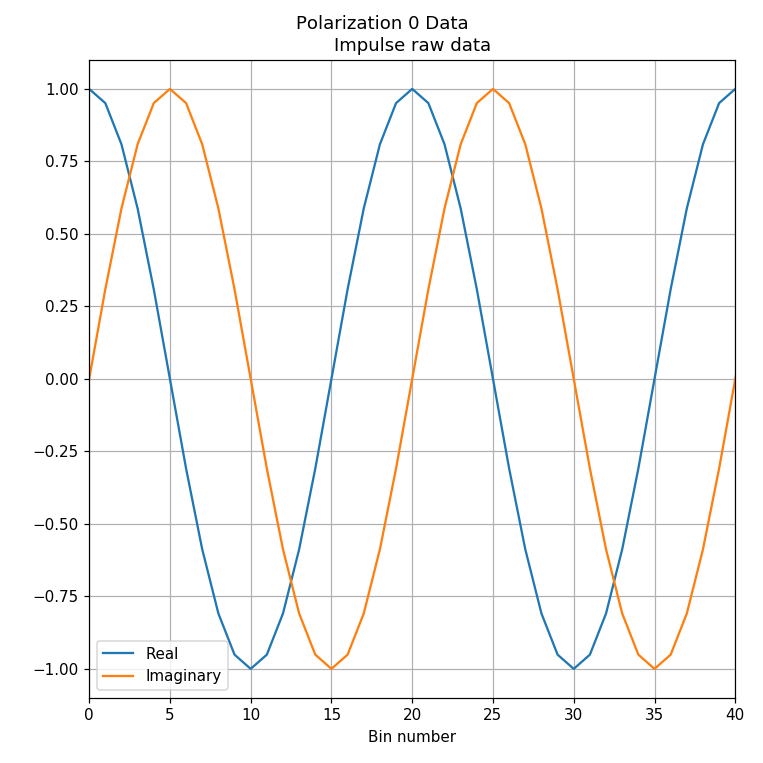

In [73]:
operation = "Detection"

fnames = [
  "pre_Detection.impulse.dump", 
  "pre_Detection.inverse.impulse.os.dump",
#           "pre_Detection.inverse.impulse.cs.dump",
  "data/impulse.noise_0.0.nseries_3.ndim_2.dump"
]

dsets = []

fft_size = 229376
# fft_size = 215376
# fft_size = 262144

for fname in fnames:
    dset = load_dump_data(fname)
    dset[0] = process_header(dset[0])
    dset[1] = dset[1].reshape((-1, 2, 2))
    dset[1] = dset[1][:,:,0] + 1j*dset[1][:,:,1]
    dsets.append(dset)

nsubplot = 1
fig, axes = plt.subplots(nsubplot, 1, figsize=(7, 7))
axes = [axes]
fig.tight_layout(rect=[0.05, 0.03, 1, 0.95])

z_map = {
    0: {"text":"Real", "fn": np.real},
    1: {"text":"Complex", "fn":np.imag}
};

os_factor = 8/7
# os_factor = 1.0
ipol = 0
z = 0
pos_filter_inverse = 6720
pos_filter_vanilla = 6676
pos_filter_diff = pos_filter_inverse - pos_filter_vanilla


fig.suptitle(f"Polarization {ipol} Data");

s_dat = dsets[0][1][:,ipol]/fft_size # simulated pulsar dump 
c_dat = dsets[1][1][:,ipol]/fft_size/os_factor #*(8/7)**2 # inversion 
c_dat = c_dat[pos_filter_diff:]
psr_dat = dsets[2][1][:,ipol]

s_dat_fft = np.fft.fft(s_dat[:fft_size])
c_dat_fft = np.fft.fft(c_dat[:fft_size])

min_shape = np.amin([s_dat.shape[0], c_dat.shape[0]])
# min_shape -= pos_filter
psr_dat = psr_dat[:min_shape]
c_dat = c_dat[:min_shape]
s_dat = s_dat[:min_shape]

# # xlim = [10500,11000]
xlim = [0,40]
# xlim = [0, min_shape]; 
# # xlim = [500000, 530000];
# # xlim = [15000, 15100];
# # xlim = [0,100]
# t = 0
# axes[t].plot(np.real(s_dat), label="Real")
# axes[t].plot(np.imag(s_dat), label="Imaginary")
# axes[t].set_xlim(xlim)
# axes[t].grid(True)
# axes[t].set_title(f"pre {operation} simulated pulsar data")
# # axes[t].legend()

# axes[t+1].plot(np.real(c_dat), label="Real")
# axes[t+1].plot(np.imag(c_dat), label="Imaginary")
# axes[t+1].set_xlim(xlim)
# axes[t+1].grid(True)
# axes[t+1].set_title(f"pre {operation} inverted channelized data")
# axes[t+1].legend()

# axes[t+2].plot(np.real(c_dat), alpha=0.8)
# axes[t+2].plot(np.real(psr_dat), alpha=0.8)

# xcorr = scipy.signal.fftconvolve(s_dat[:fft_size], np.conj(c_dat[:fft_size]), mode='same')
# axes[t+2].plot(np.abs(xcorr))
# # axes[t+2].plot(np.imag(xcorr))
# axes[t+2].set_xlim(xlim)
# axes[t+2].set_ylim([-1.05, -0.95])
# axes[t+2].grid(True)
# axes[t+2].set_title("Cross Correlation");


# diff = c_dat[:min_shape] - s_dat[:min_shape]
# axes[t+3].grid(True)
# axes[t+3].plot(np.abs(np.real(diff)), label="Real")
# axes[t+3].plot(np.abs(np.imag(diff)), label="Imaginary")
# axes[t+3].set_xlim(xlim)
# # axes[t+3].legend()

# u = 4
# axes[u].plot(np.log(np.abs(s_dat_fft)), alpha=0.8, label="vanilla dspsr")
# axes[u].plot(np.log(np.abs(c_dat_fft)), alpha=0.5, label="inverse PFB")
# axes[u].grid(True)
# axes[u].set_title(f"pre {operation} power spectrum");
# # axes[u].legend()

# axes[u+1].plot(np.angle(s_dat_fft), alpha=0.8, label="vanilla dspsr")
# axes[u+1].plot(np.angle(c_dat_fft), alpha=0.5, label="inverse PFB")
# axes[u+1].grid(True)
# axes[u+1].set_title(f"pre {operation} phase");
# axes[u+1].legend()


o = 0

axes[o].grid(True)
axes[o].plot(np.real(psr_dat), label="Real")
axes[o].plot(np.imag(psr_dat), label="Imaginary")
axes[o].set_xlim(xlim)
axes[o].set_xlabel('Bin number');
axes[o].set_title(f"Impulse raw data");
axes[o].legend()

fig.savefig('impulse.png')

# s_psr_diff = s_dat[:-pos_filter] - psr_dat[:-pos_filter]
# axes[o+1].grid(True)
# axes[o+1].plot(np.abs(np.real(s_psr_diff)))
# axes[o+1].plot(np.abs(np.imag(s_psr_diff)))
# axes[o+1].set_xlim(xlim)
# axes[o+1].set_title(f"Difference between pre Detection simulated data and raw data");


# c_psr_diff = c_dat[:-pos_filter] - psr_dat[:-pos_filter]
# axes[o+2].grid(True)
# axes[o+2].plot(np.abs(np.real(c_psr_diff)))
# axes[o+2].plot(np.abs(np.imag(c_psr_diff)))
# axes[o+2].set_xlim(xlim)
# axes[o+2].set_title(f"Difference between pre Detection inverse PFB data and raw data");

Looking at binary data files dumped in the `Convolution::transformation` method and `FilterbankInverseCPU::perform` methods. 

In the oversampling case, the spikes in the resulting power spectrum appear to translate across each of the channel subbands. In the critical sampling case, the spikes stay at the same place. 

<IPython.core.display.Javascript object>


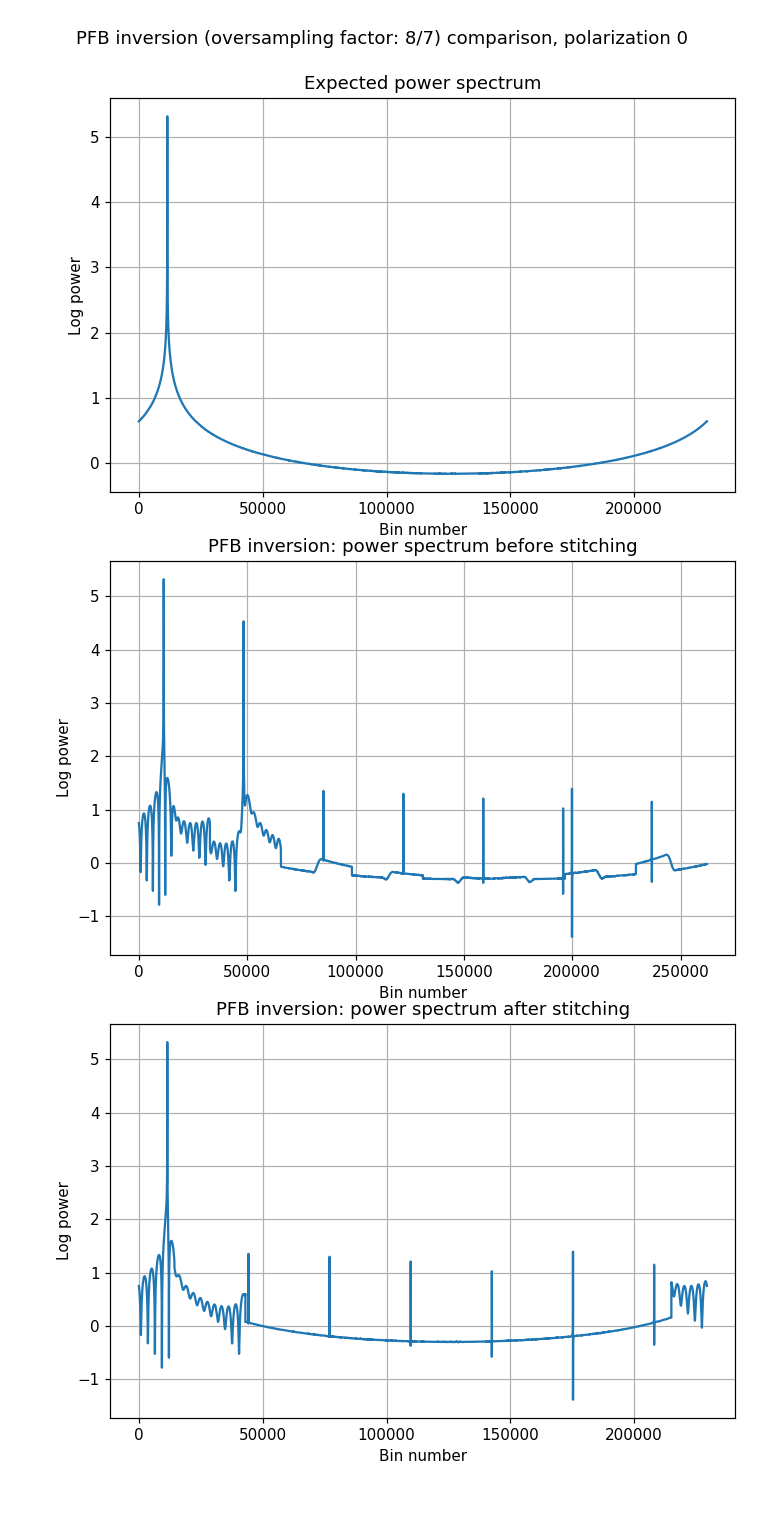

In [79]:
os_factor = (8,7)
# os_factor = (1,1)

nchan = 8
npol = 2
ndim = 2

ipol = 0

fft_size = 229376

vanilla_dump_files = {
    "post_fft":"Convolution.post_fft.dat",
    "post_ifft":"Convolution.post_ifft.dat"
}
vanilla_data = {}

if os_factor[1] / os_factor[0] == 1.0:
    inverse_dump_files = {
        "pre_stitch":"FilterbankInverse.pre_stitch.cs.dat",
        "post_stitch":"FilterbankInverse.post_stitch.cs.dat",
        "post_ifft":"FilterbankInverse.post_ifft.cs.dat"
    }
else:
    inverse_dump_files = {
        "pre_stitch":"FilterbankInverse.pre_stitch.os.dat",
        "post_stitch":"FilterbankInverse.post_stitch.os.dat",
        "post_ifft":"FilterbankInverse.post_ifft.os.dat"
    }

inverse_data = {}

def load_binary_data(npol, ndim, scale_factor=1.0):
    def _load_binary_data(file_name):
        with open(file_name, "rb") as f:
            buffer = f.read()
            arr = np.frombuffer(buffer, dtype=float_dtype)
        arr = arr.reshape((npol, -1, ndim))
        arr = arr[:,:,0] + 1j*arr[:,:,1]
        arr *= scale_factor
        return arr
    return _load_binary_data

def multi_channel_vlines(ax, ndat, nchan):
    incr = ndat / (nchan*2)
    for j in range(nchan):
        ax.axvline(2*j*incr, color="r", alpha=0.5)
#         ax.axvline((2*j + 1)*incr, color="g", alpha=0.5)
    ax.axvline((2*nchan)*incr, color="r", alpha=0.5)


vanilla_loader = load_binary_data(npol, ndim)

for label in vanilla_dump_files:
    vanilla_data[label] = vanilla_loader(vanilla_dump_files[label])
    
inverse_loader = load_binary_data(npol, ndim, os_factor[1]/os_factor[0])
    
for label in inverse_dump_files:
    inverse_data[label] = inverse_loader(inverse_dump_files[label])

nsubplot = 3
fig, axes = plt.subplots(nsubplot, 1, figsize=(7, 14))
for ax in axes:
    ax.grid(True)
    ax.set_xlabel('Bin number')
    ax.set_ylabel('Log power')
    
fig.tight_layout(rect=[0.05, 0.03, 1, 0.95])
fig.suptitle(f"PFB inversion (oversampling factor: {os_factor[0]}/{os_factor[1]}) comparison, polarization {ipol}")
# xlim = [0, 2000]
# xlim = [0, ]

v = 0
label = "post_fft"
axes[v].plot(np.log10(np.abs(vanilla_data[label][ipol,:])))
# axes[v].set_xlim(xlim)
# axes[v].plot(np.imag(vanilla_data[label][ipol,:]))
axes[v].set_title(f"Expected power spectrum");

# label = "post_ifft"
# axes[v+1].plot(np.real(vanilla_data[label][ipol,:]))
# axes[v+1].plot(np.imag(vanilla_data[label][ipol,:]))
# axes[v+1].set_title(f"vanilla: {label}");

i = v + 1
label = "pre_stitch"
axes[i].plot(np.log10(np.abs(inverse_data[label][ipol,:])))
axes[i].set_title(f"PFB inversion: power spectrum before stitching");
# multi_channel_vlines(axes[i], inverse_data[label].shape[1], nchan)

label = "post_stitch"
axes[i+1].plot(np.log10(np.abs(inverse_data[label][ipol,:])))
axes[i+1].set_title(f"PFB inversion: power spectrum after stitching");
# multi_channel_vlines(axes[i+1], inverse_data[label].shape[1], nchan)

os_text = "os"
if os_factor[0] / os_factor[1] == 1.0:
    os_text = "cs"
fig.savefig(f"pfb_comparison.{os_text}.png")
# label = "post_ifft"
# axes[i+2].plot(np.real(inverse_data[label][ipol,:]))
# axes[i+2].plot(np.imag(inverse_data[label][ipol,:]))
# axes[i+2].set_title(f"inverse: {label}");

In [ ]:
# Read in response dat files to compare to ensure they're the same 

response_file_names = [
    'response.impulse.dat',
    'response.inverse.impulse.dat'
]

n_pol, n_dims = 1, 2 
ipol = 0
responses = []

for file_name in response_file_names:
    
    with open(file_name, "rb") as f:
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=float_dtype)

    data = data.reshape((n_pol, -1, n_dims))
    data = data[:,:,0] + 1j*data[:,:,1]
    data = data.reshape((n_pol, -1))
    responses.append(data)

fig, axes = plt.subplots(len(responses), 1, figsize=(7, 10))
fig.tight_layout(rect=[0.05, 0.03, 1, 0.95])


for i in range(len(responses)):
    
    axes[i].grid(True)
    axes[i].set_xlim([0,100])
    axes[i].plot(np.real(responses[i][ipol, :]))
    axes[i].plot(np.imag(responses[i][:,ipol]))


Sanity Check. If we take the FFT of the first set of channelized data, do we reproduce what dspsr is outputting? 

<IPython.core.display.Javascript object>


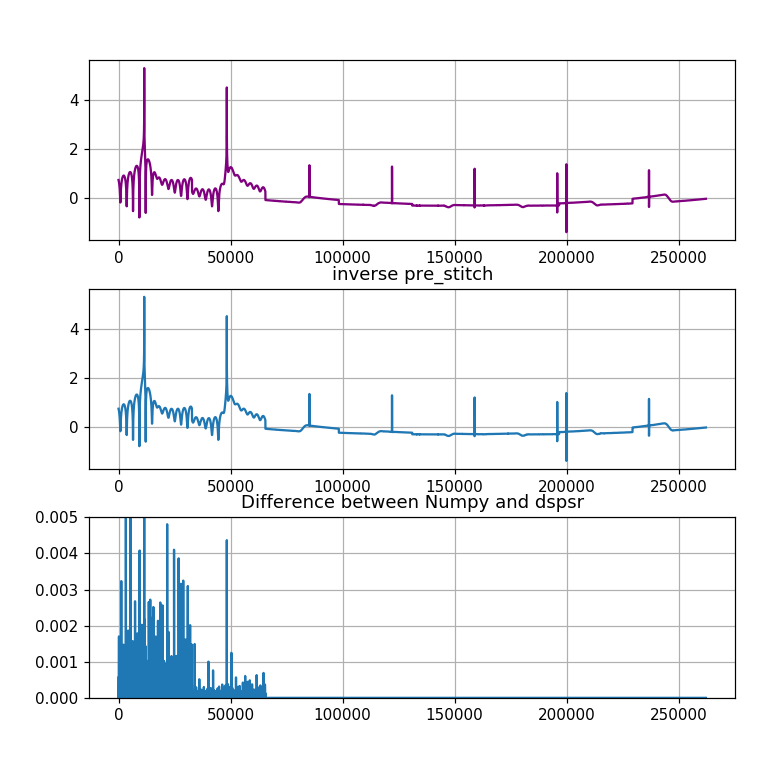

In [80]:
nchan, npol, ndim = 8, 2, 2
ipol = 0 

input_fft_size = 32768
input_discard = {
    "pos": 1040,
    "neg": 960,
}
input_discard_total = input_discard["pos"] + input_discard["neg"]

channelized_file_name = "data/full_channelized_impulse.noise_0.0.nseries_3.ndim_2.os.dump"

header, data = load_dump_data(channelized_file_name)

# data is in TFP order (time, frequency, polarization)
data = data.reshape((-1, nchan, npol, ndim))
data = data[:,:,:,0] + 1j*data[:,:,:,1]

npart = int(data.shape[2] / (input_fft_size - input_discard_total))

nsubplot = nchan
fig, axes = plt.subplots(3, 1, figsize=(7, 7))
for ax in axes:
    ax.grid(True)
fig.tight_layout(rect=[0.05, 0.03, 1, 0.95])

chan_dat_fft_assembled = np.array([], dtype=np.complex64)
for i in range(nchan):
    chan_dat = data[:input_fft_size, i, ipol]
    chan_dat_fft = np.fft.fft(chan_dat).astype(np.complex64)
    chan_dat_fft_assembled = np.concatenate((chan_dat_fft_assembled, chan_dat_fft))

chan_dat_fft_assembled *= (os_factor[1]/os_factor[0])
axes[0].plot(np.log10(np.abs(chan_dat_fft_assembled)), color="purple")
# axes[0].plot(np.abs(chan_dat_fft_assembled), color="purple")

label = "pre_stitch"
axes[1].plot(np.log10(np.abs(inverse_data[label][ipol,:])))
# axes[1].plot(np.abs(inverse_data[label][ipol,:]))
axes[1].set_title(f"inverse {label}");
# multi_channel_vlines(axes[1], inverse_data[label].shape[1], nchan)

# all_close = np.allclose(chan_dat_fft_assembled, inverse_data[label][ipol, :])
diff = np.abs(chan_dat_fft_assembled - inverse_data[label][ipol,:])
axes[2].plot(diff)
axes[2].set_ylim([0,0.005])
axes[2].set_title("Difference between Numpy and dspsr");